<a href="https://colab.research.google.com/github/duchaba/Data-Augmentation-with-Python/blob/main/data_augmentation_with_python_chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation with Python, Chapter 2

## 🌻 Welcome to Chapter 2, "Biases and Data Augmentation"


In this chapter, we’ll cover the following primary topics. 

- Computational Biases 

- Human Biases 

- Systemic Biases 

- Deep Dive to Image Augmentation Biases 

- Deep Dive to Text Augmentation Biases 

## Set up: Bring back Pluto

### ✋ STOP

- There are two methods to bring back Pluto.

1. Clone from GitHut (or update by doing "git pull if you have clone it before)

2. Or retrieve from an URL. The URL can be the GitHub URL or an URL the you store your Pluto python file from the first lesson.

- Do one, but not both.



### GitHub Clone

In [1]:
# git version should be 2.17.1 or higher
!git --version

git version 2.17.1


In [2]:
#url = 'https://github.com/PacktPublishing/Data-Augmentation-with-Python'
url = 'https://github.com/duchaba/Data-Augmentation-with-Python'
!git clone {url}

Cloning into 'Data-Augmentation-with-Python'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 25 (delta 9), reused 7 (delta 2), pack-reused 0
Unpacking objects: 100% (25/25), done.


### Fetch file from URL

In [ ]:
import requests
#
def fetch_file(url, dst):
  downloaded_obj = requests.get(url)
  with open(dst, "wb") as file:
    file.write(downloaded_obj.content)
  return

In [ ]:
url = ''
dst = 'pluto_c1.py'
fetch_file(url,dst)

- Wake up Pluto

In [3]:
#load and run the pluto chapter 1 Python code.
pluto_file = 'Data-Augmentation-with-Python/pluto/pluto_chapter_1.py'
%run {pluto_file}

---------------------------- : ----------------------------
            Hello from class : <class '__main__.PackTDataAug'> Class: PackTDataAug
                   Code name : Pluto
                   Author is : Duc Haba
---------------------------- : ----------------------------


- Double check on the server environments

In [4]:
pluto.say_sys_info()

---------------------------- : ----------------------------
                 System time : 2022/08/15 05:43
                    Platform : linux
       Python version (3.7+) : 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
     PyTorch version (1.11+) : 1.12.1+cu113
     Pandas version (1.3.5+) : 1.3.5
        PIL version (9.0.0+) : 7.1.2
 Matplotlib version (3.2.2+) : 3.2.2
                   CPU count : 2
                  *CPU speed : NOT available
---------------------------- : ----------------------------


- Copy the Pluto chapter 1 to begin chapter 2

In [5]:
pluto_chapter_2 = 'Data-Augmentation-with-Python/pluto/pluto_chapter_2.py'
!cp {pluto_file} {pluto_chapter_2}

# Fetch Kaggle Data

In [6]:
# %write -a {pluto_chapter_2}

# easy method to download kaggle data files
!pip install opendatasets --upgrade
import opendatasets
print("\nrequired version 0.1.22 or higher", opendatasets.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
required version 0.1.22 or higher 0.1.22


### Define Kaggle Download Functions

✋ STOP

- Sign up on kaggle.com and get username ad key

In [10]:
kaggle_username = "duchaba"
kaggle_key = "0c737c90feacb5c56232b0d7c24e8664"

In [14]:
@add_method(PackTDataAug)
def write_kaggle_credit(self,username=kaggle_username,key=kaggle_key):
  creds = '{"username":"'+username+'","key":"'+key+'"}'
  kdirs = ["~/.kaggle/kaggle.json", "./kaggle.json"]
  #
  for k in kdirs:
    cred_path = pathlib.Path(k).expanduser()
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)
  import kaggle
  #
  return
#
@add_method(PackTDataAug)
def fetch_kaggle_comp_data(self,cname, username=kaggle_username,key=kaggle_key):
  self.write_kaggle_credit(username=username,key=key)
  path = pathlib.Path(cname)
  kaggle.api.competition_download_cli(str(path))
  zipfile.ZipFile(f'{path}.zip').extractall(path)
  return
#
#
@add_method(PackTDataAug)
def fetch_kaggle_dataset(self,url,dest="kaggle",
  username=kaggle_username,key=kaggle_key):
  self.write_kaggle_credit(username=username,key=key)
  opendatasets.download(url,data_dir=dest)
  return

### Fetch Kaggle data

In [13]:
#
%%time
url = "https://www.kaggle.com/datasets/nightfury007/fercustomdataset-3classes"
pluto.fetch_kaggle_dataset(url)

100%|██████████| 83.1M/83.1M [00:00<00:00, 123MB/s]



CPU times: user 3.8 s, sys: 1.71 s, total: 5.51 s
Wall time: 6.4 s


In [18]:
import kaggle
import zipfile

In [20]:
kaggle_competition_name = "state-farm-distracted-driver-detection"
pluto.fetch_kaggle_comp_data(kaggle_competition_name)

100%|██████████| 4.00G/4.00G [00:30<00:00, 142MB/s]


# Draw the Images

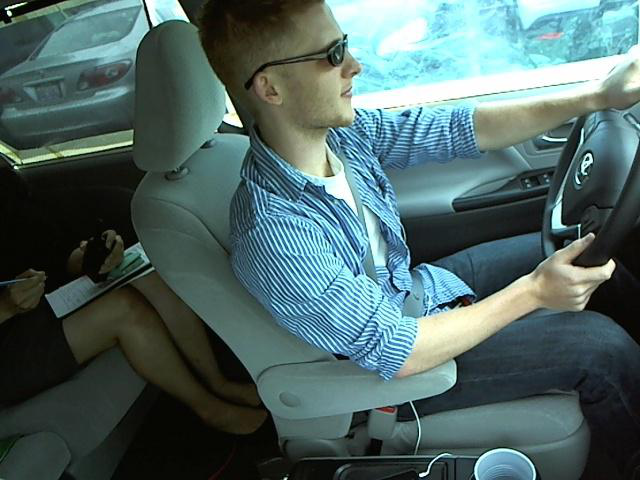

In [21]:
# quick view one image
f = 'state-farm-distracted-driver-detection/imgs/train/c0/img_100026.jpg'
img = PIL.Image.open(f)
display(img)

In [22]:
@add_method(PackTDataAug)
def draw_batch(self,df_filenames, disp_max=10,is_shuffle=False):
  disp_col = 5
  disp_row = int(numpy.round((disp_max/disp_col)+0.4, 0))
  _fns = list(df_filenames)
  if (is_shuffle):
    numpy.random.shuffle(_fns)
  k = 0
  clean_fns = []
  if (len(_fns) >= disp_max):
    canvas, pic = matplotlib.pyplot.subplots(disp_row,disp_col, figsize=(16,8))
    for i in range(disp_row):
      for j in range(disp_col):
        try:
          im = PIL.Image.open(_fns[k])
          pic[i][j].imshow(im)
          pic[i][j].set_title(pathlib.Path(_fns[k]).name)
          clean_fns.append(_fns[k])
        except:
          pic[i][j].set_title(pathlib.Path(_fns[k]).name)
        k += 1
    canvas.tight_layout()
    canvas.show()
  else:
    print("**Warning: the length should be more then ", disp_max, ". The given length: ", len(_fns))
  return clean_fns

- Create Pandas data frame to hold the data

In [23]:
f = 'state-farm-distracted-driver-detection/driver_imgs_list.csv'
pluto.df_train_images = pandas.read_csv(f)

In [24]:
pluto.df_train_images.describe()

,subject,classname,img
count,22424,22424,22424
unique,26,10,22424
top,p021,c0,img_44733.jpg
freq,1237,2489,1


In [25]:
pluto.df_train_images.tail(3)

,subject,classname,img
22421,p081,c9,img_25946.jpg
22422,p081,c9,img_67850.jpg
22423,p081,c9,img_9684.jpg


- Add in the full path column

In [ ]:
pluto + ''

In [26]:
@add_method(PackTDataAug)
def build_full_filename(self):
  root = 'state-farm-distracted-driver-detection/imgs/train/'
  self.df_train_images["image_fname"] = root + self.df_train_images.classname + '/' + self.df_train_images.img
  return

In [27]:
pluto.build_full_filename()

In [29]:
pluto.df_train_images.head(3)

,subject,classname,img,image_fname
0,p002,c0,img_44733.jpg,state-farm-distracted-driver-detection/imgs/tr...
1,p002,c0,img_72999.jpg,state-farm-distracted-driver-detection/imgs/tr...
2,p002,c0,img_25094.jpg,state-farm-distracted-driver-detection/imgs/tr...


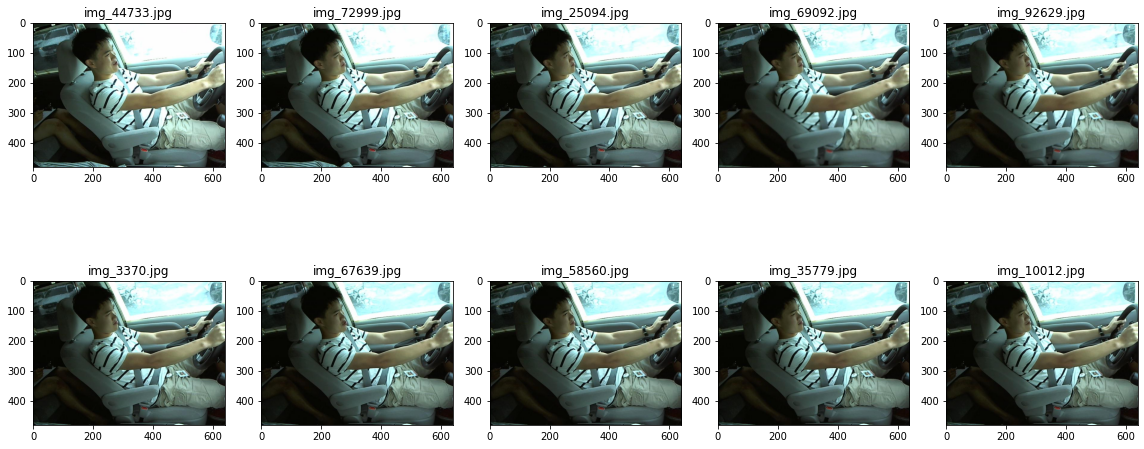

In [31]:
x = pluto.draw_batch(pluto.df_train_images["image_fname"])

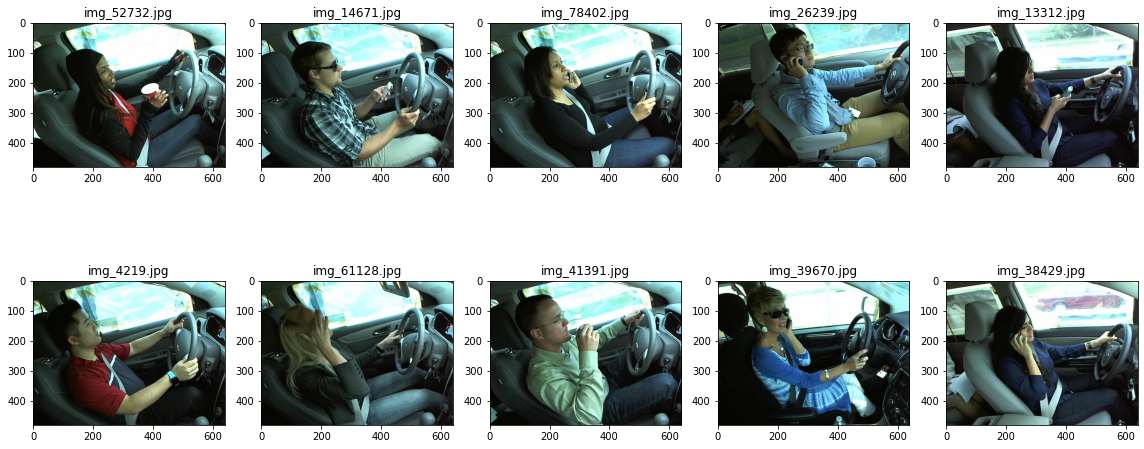

In [34]:
x = pluto.draw_batch(pluto.df_train_images["image_fname"], is_shuffle=True)

# Summary

Every chaper will begin with same base class "PacktDataAug".

✋ FAIR WARNING:

- The coding uses long and complete function path name.

- I wrote the code for easy to understand and not for compactness, fast execution, nor cleaverness.

